In [126]:
import numpy as np
import csv
import matplotlib.pyplot as plt

def isNotEmpty(x):
    return len(x) > 0

def parseFile(fileName="iris.data", x=0, y=1):
    f = open(fileName, "r")
    reader = csv.reader(f)
    data = list(filter(isNotEmpty, list(reader)))
    dataX = [float(d[x]) for d in data]
    dataY = [float(d[y]) for d in data]
    return dataX, dataY, len(data)

Linear regression using sklearn to check
------------------------------------------------

[[-0.05726823]]


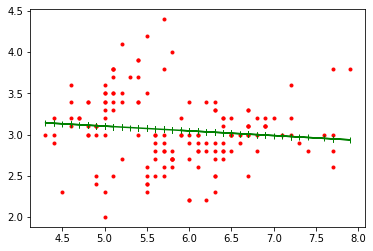

In [127]:
%matplotlib inline 
from sklearn.linear_model import LinearRegression 

paramX, paramY, size = parseFile()
paramX = np.array(list(zip(paramX)))
paramY = np.array(list(zip(paramY)))

model = LinearRegression()
model.fit(paramX, paramY)

print(model.coef_)

linRegression = model.predict(paramX)

plt.plot(paramX, paramY, linestyle='', marker='.', color='red')
plt.plot(paramX, linRegression, linestyle='solid', marker='|', color='green')

Manual linear regression implementation
------------------------------------------------

3.3886373794881335 -0.05726823379717051


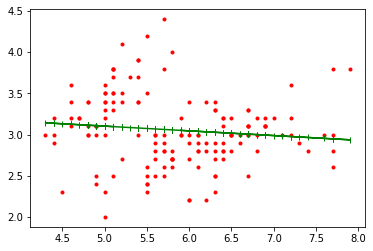

In [128]:
%matplotlib inline 

def deviation(x, y, mx, my, n):
    return np.sum(y * x) - n * my * mx

paramX, paramY, size = parseFile()
paramX = np.array(paramX)
paramY = np.array(paramY)

meanX = np.mean(paramX)
meanY = np.mean(paramY)

crossDiv = deviation(paramX, paramY, meanX, meanY, size)
xDiv = deviation(paramX, paramX, meanX, meanX, size)

coefY = crossDiv / xDiv
coefX = meanY - coefY * meanX

linRegression = coefX + coefY * paramX

print(coefX, coefY)

plt.plot(paramX, paramY, linestyle='', marker='.', color='red')
plt.plot(paramX, linRegression, linestyle='solid', marker='|', color='green')

Correlation coefficient using numpy
-----------------------------------------

In [129]:
paramX, paramY, size = parseFile()
np.corrcoef(np.array(paramX), np.array(paramY))[0][1]

-0.10936924995064937

Correlation coefficient using formula
-------------------------------------------

$r = \frac{n\sum{xy}-(\sum{x})(\sum{y})}{\sqrt{[n\sum{x^2} - (\sum{x})^2][n\sum{y^2} - (\sum{y})^2]}}$

In [130]:
paramX, paramY, size = parseFile()
paramX = np.array(paramX)
paramY = np.array(paramY)

f = lambda n, x: n * np.sum(x * x) - np.sum(x) ** 2

r = size * np.sum(paramX * paramY) - np.sum(paramX) * np.sum(paramY)
d = np.sqrt(f(size, paramX) * f(size, paramY))
r / d

-0.10936924995065972